# KNN Classification Model

## Creating Training and Testing Models

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
df=pd.read_csv('breast_cancer.csv')

In [4]:
df.head(5)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [5]:
X=df.drop('diagnose', axis=1)

In [6]:
X1=df.iloc[:,0:4]

In [7]:
X1.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion
0,5,1,1,1
1,5,4,4,5
2,3,1,1,1
3,6,8,8,1
4,4,1,1,3


In [8]:
xlabel=X1.columns[0]
ylabel=X1.columns[1]

In [9]:
y=df['diagnose']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Data standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model=KNeighborsClassifier(n_neighbors=5)   # k=5

In [13]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
ypred=model.predict(X_test)

In [15]:
ypred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1], dtype=int64)

## Accuracy for Training Data

In [16]:
model.score(X_train, y_train)

0.9790794979079498

## Accuracy for Testing Data

In [17]:
model.score(X_test, y_test)

0.9512195121951219

## Confusion Matrix

In [18]:
cm=confusion_matrix(ypred, y_test)

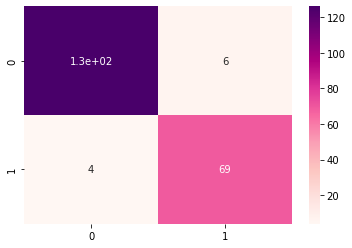

In [19]:
sns.heatmap(cm, annot=True, cmap='RdPu');

## Classification Report

In [20]:
print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       132
           1       0.92      0.95      0.93        73

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



## Scatter Plot - Cell_shape_uniformity vs Cell_size_uniformity

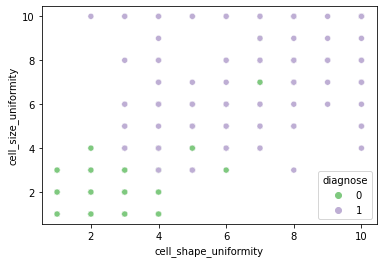

In [21]:
sns.scatterplot(data=df, x="cell_shape_uniformity", y="cell_size_uniformity", hue="diagnose", palette='Accent');

## Plotting decision boundry when considering two features ( Clump Thickness and Cell size uniformity)

In [22]:
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]

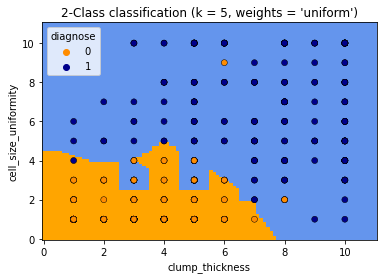

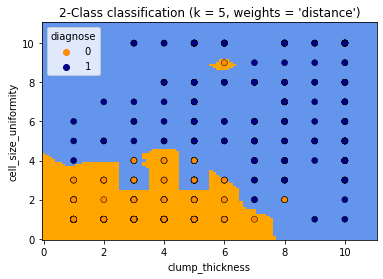

In [23]:
n_neighbors = 5

X=df.iloc[:,0:2]
y=df['diagnose']


cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]


for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    model = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    model.fit(X, y)

    _, ax= plt.subplots()
    DecisionBoundaryDisplay.from_estimator(model,X,cmap=cmap_light,ax=ax,response_method="predict",plot_method="pcolormesh",
        xlabel=X.columns[0],
        ylabel=X.columns[1],
        shading="auto")

 # Plot also the training points'

    sns.scatterplot(
        x=X.iloc[:,0],
        y=X.iloc[:,1],
        hue=y,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
       )
    
    plt.title(
        "2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights));
  